In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from PIL import Image   
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from keras.applications.vgg16 import preprocess_input

In [ ]:
train_dir = 'DATASET/TRAIN' 
test_dir = 'DATASET/TEST'

In [ ]:
train_datagen = ImageDataGenerator(width_shift_range= 0.1,
                                  horizontal_flip = True,
                                  rescale = 1./255,
                                  validation_split = 0.2)
test_datagen = ImageDataGenerator(rescale = 1./255,
                                 validation_split = 0.2)

In [ ]:
train_generator =  train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (224,224),
                                                    color_mode = 'rgb',
                                                    class_mode = 'categorical',
                                                    batch_size = 16,
                                                    subset = 'training')
validation_generator  = test_datagen.flow_from_directory(directory = test_dir,
                                                  target_size = (224,224),
                                                  color_mode = 'rgb',
                                                  class_mode = 'categorical',
                                                  subset = 'validation')

Found 866 images belonging to 5 classes.
Found 92 images belonging to 5 classes.


In [5]:
model = tf.keras.models.Sequential()

# Add the layers to the model
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(5, activation='softmax'))

In [6]:
# Assuming you have already defined and compiled your model
optimizer = Adam(learning_rate=0.001)  # Define Adam optimizer with specific learning rate

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

# Specify training hyperparameters
epochs = 50  
batch_size = 16

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 112, 112, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 56, 56, 128)       0

In [8]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [9]:
history = model.fit(train_generator, epochs = epochs,validation_data = validation_generator)

Epoch 1/50


16/55 [=======>......................] - ETA: 1:56 - loss: 8.1778 - accuracy: 0.2148

c:\Users\91879\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


55/55 [==============================] - 169s 3s/step - loss: 3.5526 - accuracy: 0.2079 - val_loss: 1.6021 - val_accuracy: 0.2174
Epoch 2/50
55/55 [==============================] - 158s 3s/step - loss: 1.5999 - accuracy: 0.2390 - val_loss: 1.5900 - val_accuracy: 0.2500
Epoch 3/50
55/55 [==============================] - 163s 3s/step - loss: 1.5760 - accuracy: 0.2794 - val_loss: 1.5177 - val_accuracy: 0.3478
Epoch 4/50
55/55 [==============================] - 160s 3s/step - loss: 1.5077 - accuracy: 0.3395 - val_loss: 1.2919 - val_accuracy: 0.5217
Epoch 5/50
55/55 [==============================] - 154s 3s/step - loss: 1.4453 - accuracy: 0.4238 - val_loss: 1.2476 - val_accuracy: 0.6087
Epoch 6/50
55/55 [==============================] - 151s 3s/step - loss: 1.3159 - accuracy: 0.4654 - val_loss: 0.9383 - val_accuracy: 0.6739
Epoch 7/50
55/55 [==============================] - 152s 3s/step - loss: 1.1798 - accuracy: 0.5381 - val_loss: 0.7738 - val_accuracy: 0.7717
Epoch 8/50
55/55 [======

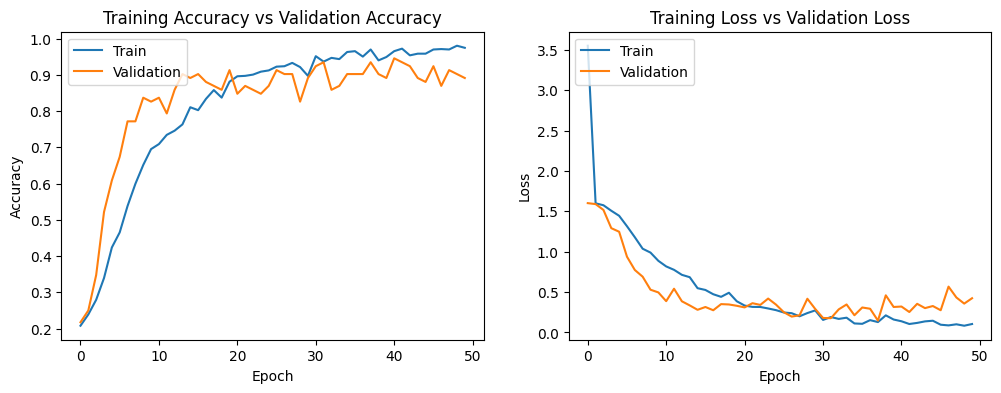

In [10]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [11]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

3/3 [==============================] - 3s 811ms/step - loss: 0.4238 - accuracy: 0.8913
final train accuracy = 98.73 , validation accuracy = 89.13


In [12]:
model.save('FitTip_2.keras')

In [3]:
from keras.models import load_model
from keras.applications.vgg16 import preprocess_input
model = load_model('FitTip_2.keras')


In [11]:
img = image.load_img('DATASET/TEST/downdog/00000008.jpg', target_size=(224, 224))
# img = image.load_img('DATASET/TEST/goddess/00000010.jpg', target_size=(224, 224))
# img = image.load_img('DATASET/TEST/plank/00000018.jpg', target_size=(224, 224))
# img = image.load_img('DATASET/TEST/tree/00000010.jpg', target_size=(224, 224))
# img = image.load_img('DATASET/TEST/warrior2/00000038.jpg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
class_labels = ['downdog', 'goddess', 'plank', 'tree', 'warrior2']
predicted_class_index = np.argmax(classes)
predicted_class_label = class_labels[predicted_class_index]
print(predicted_class_label) 

1/1 [==============================] - 0s 148ms/step
downdog


In [2]:
from keras.models import load_model
model = load_model('FitTip_2.keras')

In [3]:
class_labels = ['downdog', 'goddess', 'plank', 'warrior2', 'tree']

# Open a video capture object (0 for default camera)
cap = cv2.VideoCapture(1)

while True:
    ret, frame = cap.read()  # Read a frame from the video capture

    if not ret:
        break

    # Resize frame to match model input size (224x224)
    resized_frame = cv2.resize(frame, (224, 224))
    
    # Preprocess the frame for the model
    x = image.img_to_array(resized_frame)
    x = np.expand_dims(x, axis=0)
    img_data = preprocess_input(x)

    # Predict classes using the model
    classes = model.predict(img_data)

    # Get the predicted class label
    predicted_class_index = np.argmax(classes)
    predicted_class_label = class_labels[predicted_class_index]

    # Display the predicted class label on the frame
    cv2.putText(frame, predicted_class_label, (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

    # Show the frame with the predicted label
    cv2.imshow('Yoga Pose Classifier', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object and close all windows
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 91ms/step


: 